<a href="https://colab.research.google.com/github/Blantranderozari/Blantranderozari/blob/main/Draft_Tugas_Proyek_Akhir_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir Dicoding Module: Belajar Machine Learning untuk Pemula
oleh Antonius Blantran de Rozari

## Kriteria

* ~Dataset yang dipakai haruslah dataset berikut : rockpaperscissors, atau gunakan link ini pada wget command: https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip.~
* Dataset harus dibagi menjadi train set dan validation set.
* Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
* Harus mengimplementasikan augmentasi gambar.
* Menggunakan image data generator.
* Model harus menggunakan model sequential.
* Pelatihan model tidak melebihi waktu 30 menit.
* ~Program dikerjakan pada Google Colaboratory.~
* Akurasi dari model minimal 85%.
* Dapat memprediksi gambar yang diunggah ke Colab
* Menambahkan data diri (sesuai profil Dicoding) pada submission/project yang dikirimkan.

Pilihan pertama:
1. Mulai dari awal sama sekali
2. Mulai dengan best weight result dan lanjutkan training
3. Langsung deteksi





## Aktifkan GPU


In [1]:
# Gunakan GPU yang disediakan oleh Google Colab
import tensorflow as tf 
print(f"Versi tensorflow {tf.__version__}")

if (tf.config.list_physical_devices('GPU')):
  print(f"Tersedia GPU sejumlah {len(tf.config.list_physical_devices('GPU'))} dengan name {tf.test.gpu_device_name()}")
else:
  print("GPU belum diaktifkan atau tidak tersedia saat ini")


Versi tensorflow 2.9.2
GPU tidak diaktifkan atau belum tersedia saat ini


In [2]:
#!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
#!unzip rockpaperscissors.zip

## Unduh data dan tampilkan contoh citra tiap kategor

Dataset menyimpan 2.188 citra yang terbagi atas 3 kelas yaitu: 'Rock' (726 citra), 'Paper' (710 citra) and 'Scissors' (752 citra) dalam format png berukuran 300 x 200 pixels. Setiap kelas citra disimpan dalam tiga sub-folders dengan nama sesuai dengan kelasnya masing-masing.

In [42]:
import tensorflow as tf
from pathlib import Path

from tensorflow.keras.utils import get_file

url_data = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"
base_dir = get_file(origin=url_data, cache_dir="/tmp", 
                    archive_format='auto', extract=True)

base_dir = pathlib.Path(base_dir)
base_dir = base_dir.with_suffix('')
base_dir = base_dir / 'rps-cv-images'


In [103]:
print(base_dir)

jumlah_citra = len(list(base_dir.glob('**/*.png')))
print(jumlah_citra)

/tmp/datasets/rockpaperscissors/rps-cv-images
2188


In [133]:
# SHOW SOME IMAGE SAMPLES -- MOVE THIS CELL AFTER WE DETECT THE CLASS NAME
for kategori in ['paper', 'rock', 'scissors']:
  #print(kategori)
  cur_path = kategori + '/*.png'
  #print(cur_path)
  kat_citra = list(base_dir.glob(kategori + '/*.png'))
  print(str(kat_citra[:5]))
 
  

[PosixPath('/tmp/datasets/rockpaperscissors/rps-cv-images/paper/3JN7OPsnxDBpcVeD.png'), PosixPath('/tmp/datasets/rockpaperscissors/rps-cv-images/paper/CrEzO2508GiIMFrx.png'), PosixPath('/tmp/datasets/rockpaperscissors/rps-cv-images/paper/y9DoLrI4Hlh2EUts.png'), PosixPath('/tmp/datasets/rockpaperscissors/rps-cv-images/paper/YTZfr87ETKYNkQRN.png'), PosixPath('/tmp/datasets/rockpaperscissors/rps-cv-images/paper/ejC8QIku5jrtci48.png')]
[PosixPath('/tmp/datasets/rockpaperscissors/rps-cv-images/rock/QdUOXLvrrFZbV5G6.png'), PosixPath('/tmp/datasets/rockpaperscissors/rps-cv-images/rock/I1T89xw2qr4aTrzq.png'), PosixPath('/tmp/datasets/rockpaperscissors/rps-cv-images/rock/QF1S0sqb6YGe4GNP.png'), PosixPath('/tmp/datasets/rockpaperscissors/rps-cv-images/rock/fGaDsQT8mUTaytaT.png'), PosixPath('/tmp/datasets/rockpaperscissors/rps-cv-images/rock/2vwLOZSd8FCXbuck.png')]
[PosixPath('/tmp/datasets/rockpaperscissors/rps-cv-images/scissors/pjOgxx8uZf2XPDFu.png'), PosixPath('/tmp/datasets/rockpaperscissors

In [138]:
batch_size = 32
img_height = 100
img_width = 150

dataset_latihan = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.4,
  subset="latihan",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2188 files belonging to 3 classes.
Using 1313 files for training.


In [139]:
dataset_validasi = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.4,
  subset="validasi",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2188 files belonging to 3 classes.
Using 875 files for validation.


In [140]:
kategori = dataset_latihan.class_names
print(kategori)

['paper', 'rock', 'scissors']


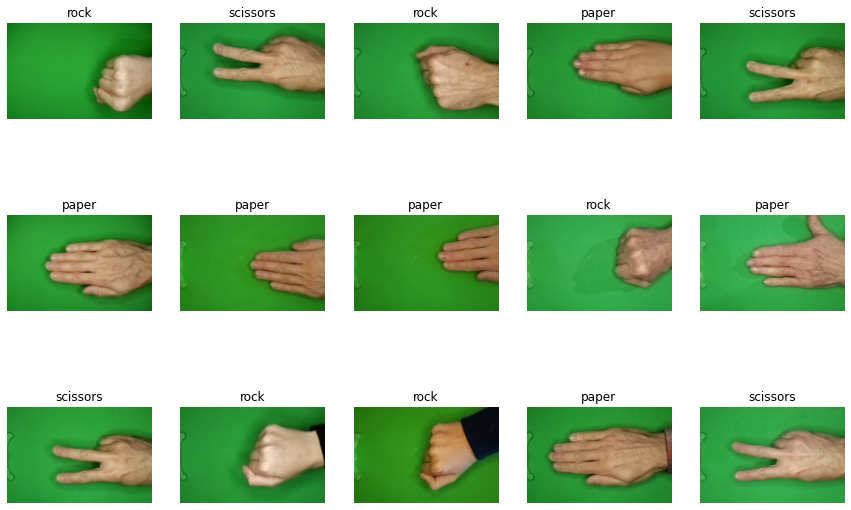

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for citra, label in dataset_latihan.take(1):
  for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(citra[i].numpy().astype("uint8"))
    plt.title(kategori[label[i]])
    plt.axis("off")

## Proses Augmentasi Citra dan generate data 
untuk pelatihan dan validasi 